In [201]:
import pymysql
db = pymysql.connect(host= "cdb-r2g8flnu.bj.tencentcdb.com", port=10209, user="dase2020", password="dase2020", database="dase_intro_2020")
cursor = db.cursor()
sql = "SELECT VERSION();"
cursor.execute(sql)
result = cursor.fetchone()
print(result)

('5.7.18-20170830-log',)


In [202]:
# lab9-1
sql = 'SELECT * FROM SH_Grade'
cursor.execute(sql)
result1 = cursor.fetchall()
sql2 = 'SELECT COLUMN_NAME FROM information_schema.COLUMNS where table_name = "SH_Grade"'
cursor.execute(sql2)
result2 = cursor.fetchall()

In [203]:
import csv
columns_name  = [i[0] for i in result2]
columns_name.insert(1, 'Class')

with open('SH_Grade.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(columns_name)
    for stu in result1:
        stu = list(stu)
        if stu[1] is not None:
            stu.insert(1, stu[1][0])
        else :
            stu.insert(1, None)
        writer.writerow(stu)

In [204]:
# lab9-2 数据预处理1
import pandas as pd
data = pd.read_csv('SH_Grade.csv')
print(data.shape[0])
data = data.drop_duplicates(subset=['StuId'])
print(data.shape[0])

252
243


In [205]:
# lab9-3 数据预处理2
data = data.dropna(thresh=data.shape[1]-11)
print(data.shape[0])

189


In [206]:
# lab9-4 数据预处理3
data['Sex'] = data['Sex'].fillna(method='ffill')
# 获得所有的考试列索引
grade_columns_name = data.columns[4:]
for i in grade_columns_name:
    data[i] = data[i].fillna(data[i].median())

In [207]:
# lab9-5 数据预处理5
# 用上一个cell的grade_columns_name
# 利用分类找出非百分制，并且替换为百分制
for i in grade_columns_name:
    if data[i].max() <= 60:
        data[i] = data[i]/60 * 100
    elif data[i].max() <= 90 and i[0:3] == 'PHY':
        data[i] = data[i]/90 * 100
    elif data[i].max() > 120:
        data[i] = data[i]/150 * 100
    elif data[i].max() > 100:
        data[i] = data[i]/120 * 100
data.describe()

,id,CHI611,MATH611,ENG611,CHI612,MATH612,ENG612,CHI621,MATH621,ENG621,...,CHI912,MATH912,ENG912,PHY912,CHE912,CHI921,MATH921,ENG921,PHY921,CHE921
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,115.095238,73.746032,82.656085,80.386243,74.936508,80.735450,81.497354,76.158730,82.679894,80.724868,...,77.356261,80.074074,79.307760,77.613757,80.751323,74.707231,77.481481,82.405644,81.416814,77.354497
std,68.653241,7.322295,16.521206,13.744013,9.180008,17.737863,13.740615,9.015719,16.260084,15.312992,...,8.257889,20.675168,18.076107,16.697370,17.591601,9.588711,18.997491,16.172900,17.491732,18.302605
min,1.000000,41.000000,12.000000,34.000000,25.000000,9.000000,45.000000,48.000000,10.000000,33.000000,...,46.000000,5.333333,15.333333,13.000000,15.000000,36.000000,6.666667,13.333333,17.777778,6.666667
25%,57.000000,70.000000,76.000000,72.000000,71.000000,75.000000,74.000000,72.000000,78.000000,71.000000,...,74.000000,78.000000,74.333333,68.000000,76.000000,70.666667,72.666667,79.666667,75.555556,71.666667
50%,114.000000,75.000000,86.000000,85.000000,77.000000,86.000000,85.000000,77.000000,87.500000,86.000000,...,79.000000,87.333333,86.833333,83.000000,86.000000,77.000000,82.666667,88.666667,87.777778,83.333333
75%,170.000000,79.000000,95.000000,90.000000,81.000000,93.000000,92.000000,83.000000,94.000000,92.000000,...,82.666667,92.000000,91.666667,90.000000,93.000000,80.666667,90.000000,92.333333,93.333333,90.000000
max,243.000000,88.000000,100.000000,99.000000,89.000000,100.000000,100.000000,93.000000,100.000000,100.000000,...,92.666667,100.000000,98.333333,98.000000,98.000000,89.333333,100.000000,98.333333,100.000000,96.666667


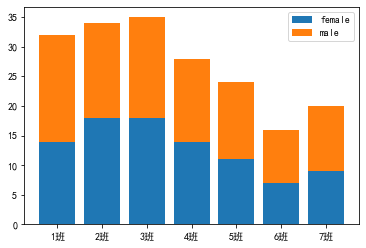

In [208]:
# lab9-6 数据分析与可视化1
import matplotlib.pyplot as plt
class_female = data.loc[data['Sex'] == 'F'].groupby('Class')['Class'].count()
class_male = data.loc[data['Sex'] == 'M'].groupby('Class')['Class'].count()
plt.bar(class_female.index, class_female.values, tick_label=['1班', '2班', '3班', '4班', '5班', '6班', '7班'], label='female')
plt.bar(class_male.index, class_male.values, tick_label=['1班', '2班', '3班', '4班', '5班', '6班', '7班'], label='male', bottom=class_female.values)
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.legend()
plt.show()

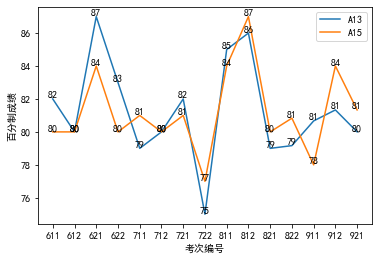

In [209]:
# lab9-7 数据分析与可视化2
A13 = data.loc[data['StuId'] == 'A13'].iloc[:, 4:]
A15 = data.loc[data['StuId'] == 'A15'].iloc[:, 4:]
A13_CHI = []
A15_CHI = []
for i in A13.columns:
    if i[0:3] == 'CHI':
        A13_CHI.append(A13[i].iloc[0])
for i in A15.columns:
    if i[0:3] == 'CHI':
        A15_CHI.append(A15[i].iloc[0])

CHI = ['611', '612', '621', '622', '711', '712', '721', '722', '811', '812', '821', '822', '911', '912', '921']
plt.plot(CHI, A13_CHI, label='A13')
plt.plot(CHI, A15_CHI, label='A15')
for x1, y1 in zip(CHI, A13_CHI):
    plt.text(x1, y1, str(round(y1)), ha='center', va='bottom', fontsize=10)
for x1, y1 in zip(CHI, A15_CHI):
    plt.text(x1, y1, str(round(y1)), ha='center', va='bottom', fontsize=10)
plt.legend()
plt.xlabel('考次编号')
plt.ylabel('百分制成绩')
plt.show()

In [210]:
# lab9-8 数据分析3
data8 = data.loc[(data['ENG721'] < 60) & (data['CHI721'] < 60)]
data8 = pd.DataFrame(data8, columns=['StuId', 'Class', 'ENG721', 'CHI721'])
# data8_2 储存着学生编号、班级、英语成绩、语文成绩。
print(data8)

    StuId Class  ENG721  CHI721
57    B17     B    30.0    42.0
176   E26     E    26.0    53.0
178   E28     E    36.0    48.0
180   E30     E    34.0    48.0
193   F11     F    34.0    50.0
200   F18     F    53.0    58.0
226   G14     G    52.0    48.0


In [211]:
# lab9-9 数据分析4
suj_columns = data.columns[13:16]
data9 = data.groupby('Class').mean()
data9_2 = data.groupby('Class').var()
dataA_mean = data9.iloc[0, 13:16]
dataA_var = data9_2.iloc[0, 13:16]
dataB_mean = data9.iloc[2, 13:16]
dataB_var = data9_2.iloc[2, 13:16]
print("平均分：\n"
      "A：{:.1f}, {:.1f}, {:.1f}\n"
      "C：{:.1f}, {:.1f}, {:.1f}".format(dataA_mean[0], dataA_mean[1], dataA_mean[2], dataB_mean[0], dataB_mean[1], dataB_mean[2]))
print("方差：\n"
      "A：{:.1f}, {:.1f}, {:.1f}\n"
      "C：{:.1f}, {:.1f}, {:.1f}".format(dataA_var[0], dataA_var[1], dataA_var[2], dataB_var[0], dataB_var[1], dataB_var[2]))
# 语文A班平均分高一点，方差两个班差距不大
# 数学A班平均分高一点点，并且方差更小，各个学生成绩差异小
# 英语A班平局分低一点，但是方差小很多，C班方差很大，各个学生之间差异很大

平均分：
A：80.6, 91.4, 86.6
C：77.9, 90.5, 87.0
方差：
A：33.1, 19.5, 39.4
C：32.3, 35.6, 74.4


In [213]:
# lab9-10 数据存储
data8.to_csv('task8.csv', index=0)